## Time Series Analysis
Reference: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data<br>
This is a kaggle competition and in this competition we will use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.<br>

Specifically, we'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import os
os.listdir('./sample_data/')

['holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [3]:
holidays_df = pd.read_csv('./sample_data/holidays_events.csv')
oils_df = pd.read_csv('./sample_data/oil.csv')
stores_df = pd.read_csv('./sample_data/stores.csv')
tran_df = pd.read_csv('./sample_data/transactions.csv')

# Exploring Datasets
## holidays_events.csv
Holidays and Events, with metadata<br>
NOTE: Pay special attention to the transferred column.<br>
* A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government.
* A transferred day is more like a normal day than a holiday.
* To find the day that it was actually celebrated, look for the corresponding row where type is Transfer.
* For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12.
* Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
* Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [10]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [11]:
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [12]:
holidays_df.shape

(350, 6)

In [13]:
holidays_df.describe().transpose()

,count,unique,top,freq
date,350,312,2014-06-25,4
type,350,6,Holiday,221
locale,350,3,National,174
locale_name,350,24,Ecuador,174
description,350,103,Carnaval,10
transferred,350,2,False,338


In [14]:
holidays_df.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [15]:
holidays_df['date'] = pd.to_datetime(holidays_df.date)
holidays_df['month']=holidays_df.date.dt.month
holidays_df['year']=holidays_df.date.dt.year
holidays_df['day']=holidays_df.date.dt.day_name()
holidays_df['day_date']=holidays_df.date.dt.day
holidays_df.head(5)

,date,type,locale,locale_name,description,transferred,month,year,day,day_date
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,3,2012,Friday,2
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,4,2012,Sunday,1
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,4,2012,Thursday,12
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,4,2012,Saturday,14
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,4,2012,Saturday,21


## oil.csv
* Daily oil price. Includes values during both the train and test data timeframes.
* (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [16]:
oils_df.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [17]:
oils_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [18]:
oils_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


In [19]:
oils_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [20]:
oils_df.shape

(1218, 2)

In [21]:
oils_df['date'] = pd.to_datetime(oils_df.date)
oils_df['month']=oils_df.date.dt.month
oils_df['year']=oils_df.date.dt.year
oils_df['day']=oils_df.date.dt.day_name()
oils_df['day_date']=oils_df.date.dt.day
oils_df.head(5)

,date,dcoilwtico,month,year,day,day_date
0,2013-01-01,NaN,1,2013,Tuesday,1
1,2013-01-02,93.14,1,2013,Wednesday,2
2,2013-01-03,92.97,1,2013,Thursday,3
3,2013-01-04,93.12,1,2013,Friday,4
4,2013-01-07,93.20,1,2013,Monday,7


## stores.csv
* Store metadata, including city, state, type, and cluster.
* cluster is a grouping of similar stores.

In [22]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [23]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [24]:
stores_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
store_nbr,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
cluster,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0


In [25]:
stores_df.shape

(54, 5)

In [26]:
stores_df.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

## transactions.csv
* Gives the information on number of transactions on particular date by store number

In [27]:
tran_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [28]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [29]:
tran_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


In [30]:
tran_df.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [31]:
tran_df['date'] = pd.to_datetime(tran_df['date'])
tran_df['month']=tran_df.date.dt.month
tran_df['year']=tran_df.date.dt.year
tran_df['day']=tran_df.date.dt.day_name()
tran_df['day_date']=tran_df.date.dt.day
tran_df.head(5)

,date,store_nbr,transactions,month,year,day,day_date
0,2013-01-01,25,770,1,2013,Tuesday,1
1,2013-01-02,1,2111,1,2013,Wednesday,2
2,2013-01-02,2,2358,1,2013,Wednesday,2
3,2013-01-02,3,3487,1,2013,Wednesday,2
4,2013-01-02,4,1922,1,2013,Wednesday,2


## train.csv
* The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
* store_nbr identifies the store at which the products are sold.
* family identifies the type of product sold.
* sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be * sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

In [32]:
train_df = pd.read_csv('./sample_data/train.csv')
train_df.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320768 entries, 0 to 320767
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           320768 non-null  int64  
 1   date         320768 non-null  object 
 2   store_nbr    320767 non-null  float64
 3   family       320767 non-null  object 
 4   sales        320767 non-null  float64
 5   onpromotion  320767 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 14.7+ MB


In [34]:
train_df.shape

(320768, 6)

In [35]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,320768.0,160383.500000,92597.889911,0.0,80191.75,160383.5,240575.25,320767.0
store_nbr,320767.0,27.499422,15.586130,1.0,14.00,27.0,41.00,54.0
sales,320767.0,203.146179,685.402091,0.0,0.00,0.0,93.00,26067.0
onpromotion,320767.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [36]:
train_df.isna().sum()

id             0
date           0
store_nbr      1
family         1
sales          1
onpromotion    1
dtype: int64

In [37]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['month']=train_df.date.dt.month
train_df['year']=train_df.date.dt.year
train_df['day']=train_df.date.dt.day_name()
train_df['day_date']=train_df.date.dt.day
train_df.head(5)

,id,date,store_nbr,family,sales,onpromotion,month,year,day,day_date
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,1,2013,Tuesday,1
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,1,2013,Tuesday,1
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,1,2013,Tuesday,1
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,1,2013,Tuesday,1
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,1,2013,Tuesday,1


## test.csv
* The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
* The dates in the test data are for the 15 days after the last date in the training data.

In [38]:
test_df = pd.read_csv('./sample_data/test.csv')
test_df.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [40]:
test_df.shape

(28512, 5)

In [41]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,28512.0,3.015144e+06,8230.849774,3000888.0,3008015.75,3015143.5,3022271.25,3029399.0
store_nbr,28512.0,2.750000e+01,15.586057,1.0,14.00,27.5,41.00,54.0
onpromotion,28512.0,6.965383e+00,20.683952,0.0,0.00,0.0,6.00,646.0


In [42]:
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [43]:
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['month']=test_df.date.dt.month
test_df['year']=test_df.date.dt.year
test_df['day']=test_df.date.dt.day_name()
test_df['day_date']=test_df.date.dt.day
test_df.head(5)

,id,date,store_nbr,family,onpromotion,month,year,day,day_date
0,3000888,2017-08-16,1,AUTOMOTIVE,0,8,2017,Wednesday,16
1,3000889,2017-08-16,1,BABY CARE,0,8,2017,Wednesday,16
2,3000890,2017-08-16,1,BEAUTY,2,8,2017,Wednesday,16
3,3000891,2017-08-16,1,BEVERAGES,20,8,2017,Wednesday,16
4,3000892,2017-08-16,1,BOOKS,0,8,2017,Wednesday,16


## Exploratory Data Analysis
* Holidays

In [44]:
holidays_df.head(10)

,date,type,locale,locale_name,description,transferred,month,year,day,day_date
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,3,2012,Friday,2
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,4,2012,Sunday,1
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,4,2012,Thursday,12
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,4,2012,Saturday,14
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,4,2012,Saturday,21
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False,5,2012,Saturday,12
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False,6,2012,Saturday,23
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,6,2012,Monday,25
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,6,2012,Monday,25
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False,6,2012,Monday,25


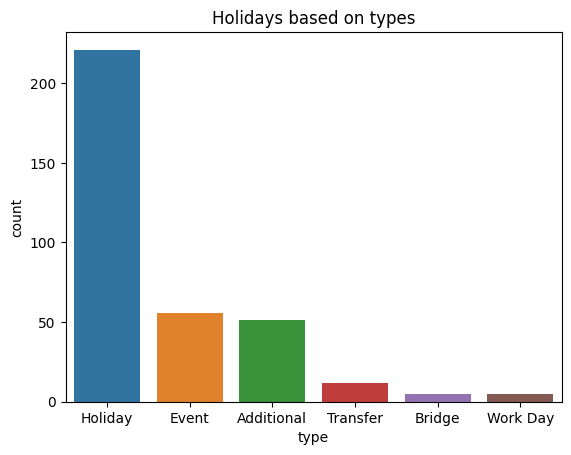

In [45]:
type_order = holidays_df['type'].value_counts().index
sns.countplot(data=holidays_df, x='type', order=type_order)
plt.title('Holidays based on types')
plt.show()

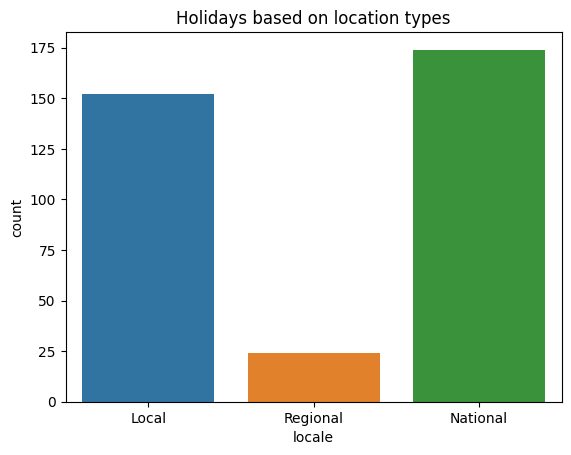

In [46]:
sns.countplot(data=holidays_df, x='locale')
plt.title('Holidays based on location types')
plt.show()

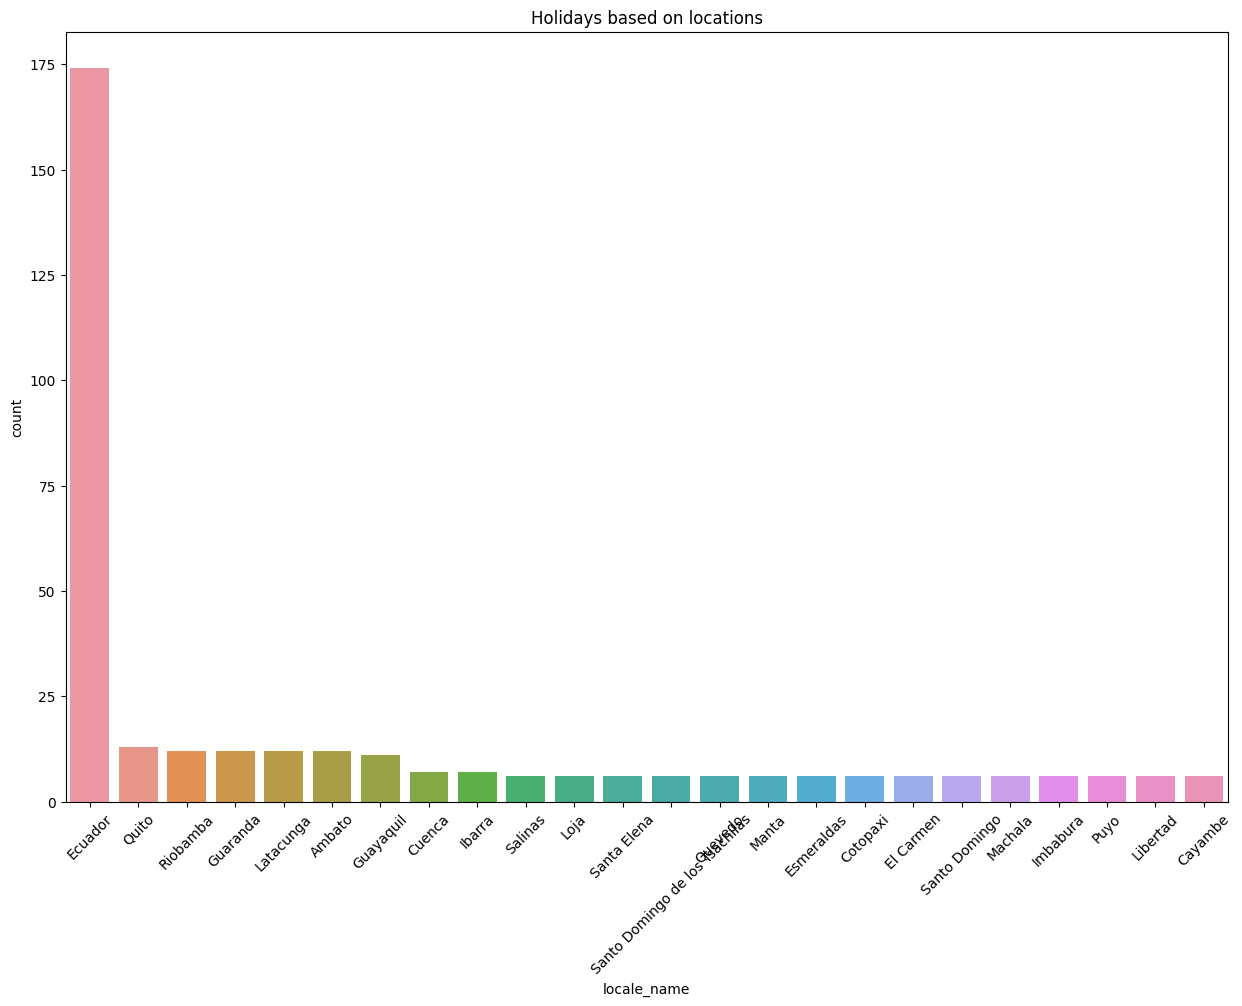

In [47]:
l_order = holidays_df['locale_name'].value_counts().index
plt.figure(figsize=(15,10))
sns.countplot(data=holidays_df, x='locale_name',order=l_order)
plt.title('Holidays based on locations')
plt.xticks(rotation=45)
plt.show()

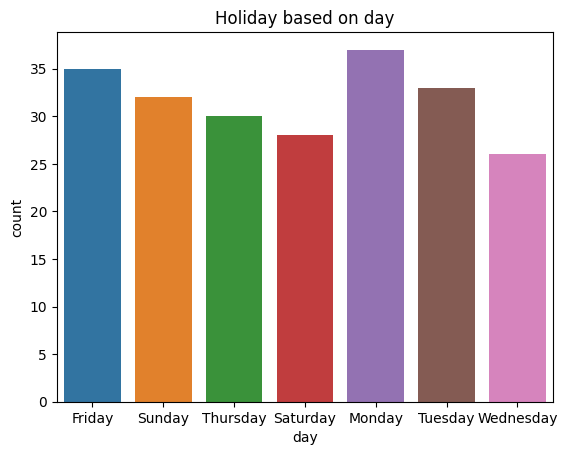

In [48]:
sns.countplot(data=holidays_df[holidays_df.type=='Holiday'],x='day')
plt.title("Holiday based on day")
plt.show()

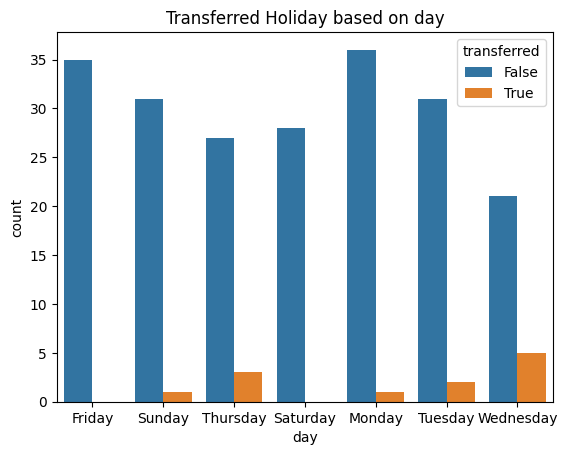

In [49]:
sns.countplot(data=holidays_df[holidays_df.type=='Holiday'],x='day', hue='transferred')
plt.title("Transferred Holiday based on day")
plt.show()

* Oils

In [50]:
oils_df.head(10)

,date,dcoilwtico,month,year,day,day_date
0,2013-01-01,NaN,1,2013,Tuesday,1
1,2013-01-02,93.14,1,2013,Wednesday,2
2,2013-01-03,92.97,1,2013,Thursday,3
3,2013-01-04,93.12,1,2013,Friday,4
4,2013-01-07,93.20,1,2013,Monday,7
5,2013-01-08,93.21,1,2013,Tuesday,8
6,2013-01-09,93.08,1,2013,Wednesday,9
7,2013-01-10,93.81,1,2013,Thursday,10
8,2013-01-11,93.60,1,2013,Friday,11
9,2013-01-14,94.27,1,2013,Monday,14


In [51]:
oils_mean = oils_df.dcoilwtico.mean()
oils_df.dcoilwtico.fillna(oils_mean,inplace=True)
oils_df.isna().sum()

date          0
dcoilwtico    0
month         0
year          0
day           0
day_date      0
dtype: int64

<Axes: xlabel='dcoilwtico', ylabel='Density'>

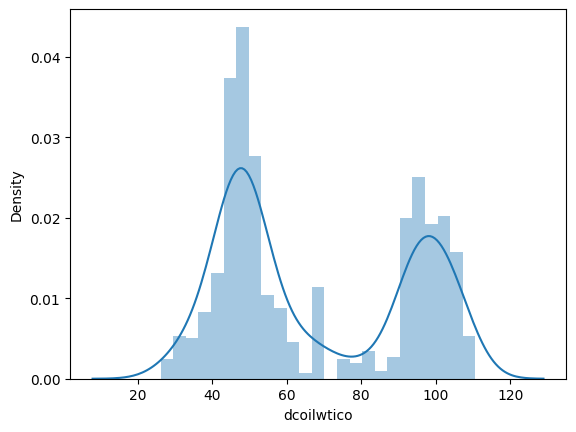

In [52]:
sns.distplot(oils_df['dcoilwtico'], kde=True, bins=25)

In [53]:
oils_df.groupby('year')['dcoilwtico'].mean()

year
2013    96.938810
2014    92.294365
2015    49.313867
2016    44.135744
2017    49.976383
Name: dcoilwtico, dtype: float64

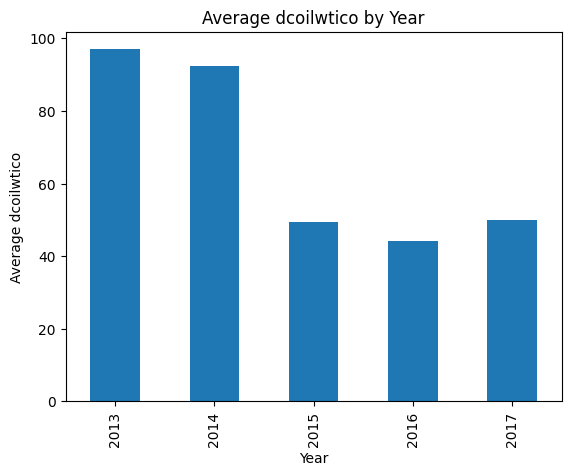

In [54]:
pivot_table = oils_df.pivot_table(index='year', values='dcoilwtico', aggfunc='mean')

# Plotting the graph
pivot_table.plot(kind='bar', legend=False)
plt.xlabel('Year')
plt.ylabel('Average dcoilwtico')
plt.title('Average dcoilwtico by Year')
plt.show()

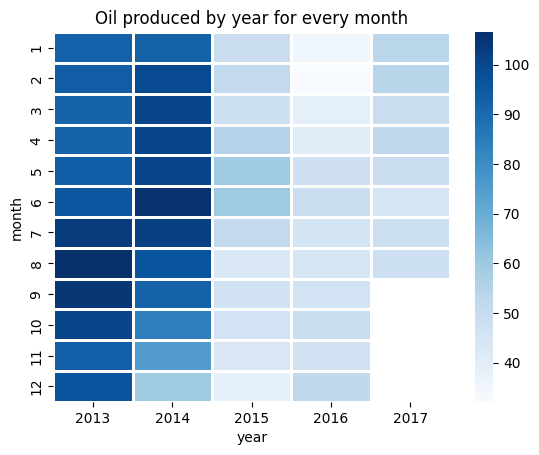

In [55]:
oils_year_month = oils_df.pivot_table(index='month', columns='year', values='dcoilwtico')
# You can separate data with lines
sns.heatmap(oils_year_month, cmap='Blues', linecolor='white', linewidth=1)
plt.title('Oil produced by year for every month')
plt.show()

In [56]:
stores_df.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


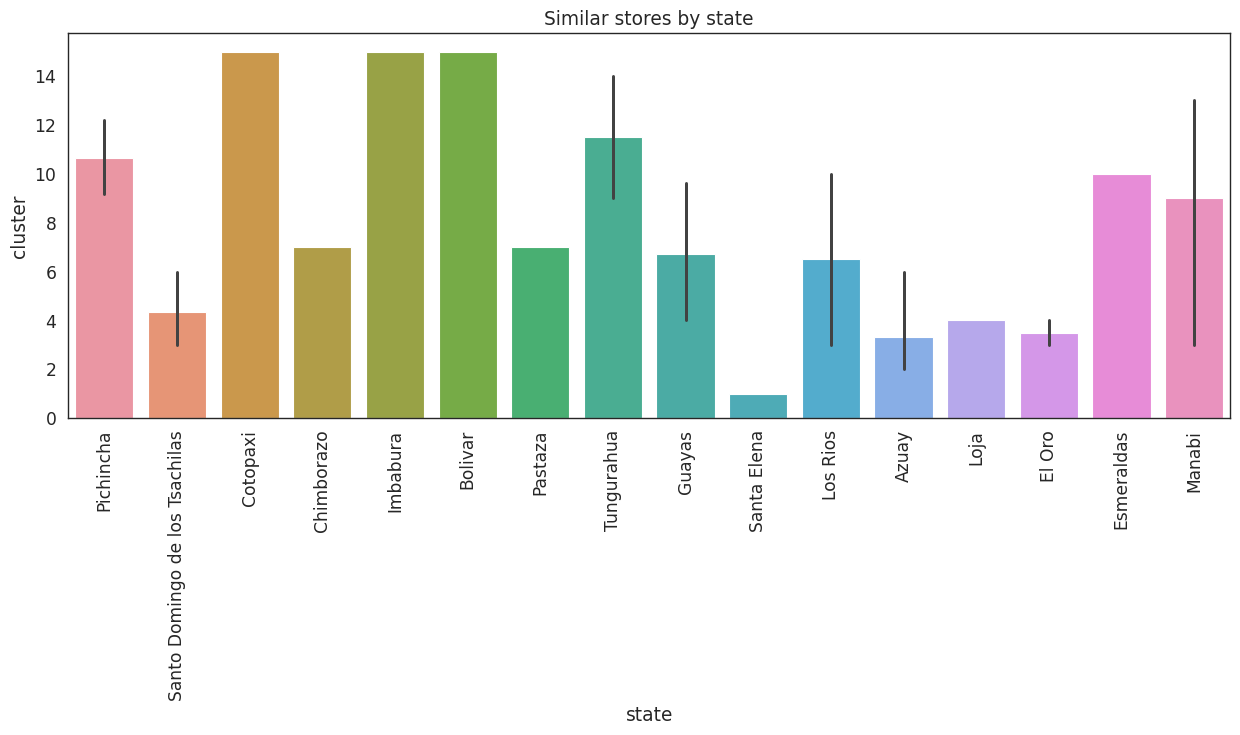

In [96]:
plt.figure(figsize=(15,5))
sns.barplot(x='state',y='cluster',data=stores_df)
plt.xticks(rotation=90)
plt.title("Similar stores by state")
plt.show()

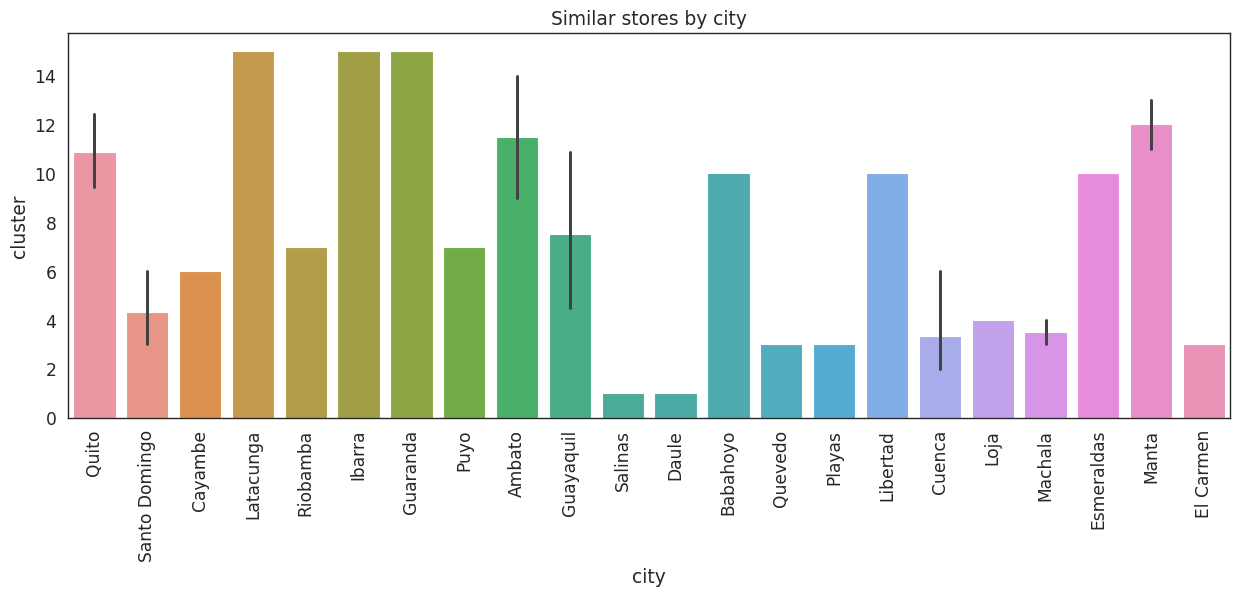

In [95]:
plt.figure(figsize=(15,5))
sns.barplot(x='city',y='cluster',data=stores_df)
plt.xticks(rotation=90)
plt.title("Similar stores by city")
plt.show()

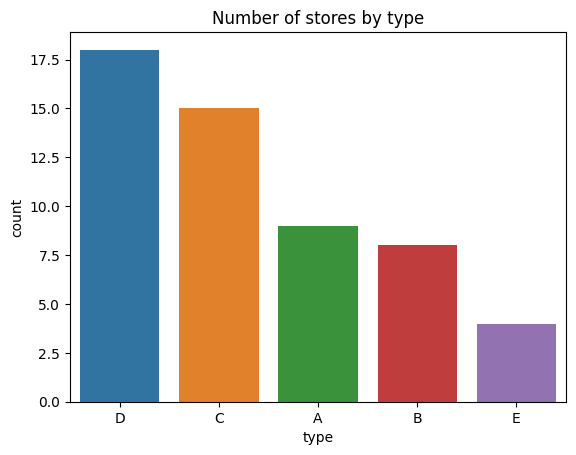

In [59]:
s_order = stores_df['type'].value_counts().index
sns.countplot(x='type',data=stores_df,order=s_order)
plt.title('Number of stores by type')
plt.show()

In [60]:
stores_sales_df=pd.merge(train_df,stores_df,on='store_nbr',how='inner')
stores_sales_df.head(5)

,id,date,store_nbr,family,sales,onpromotion,month,year,day,day_date,city,state,type,cluster
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,1,2013,Tuesday,1,Quito,Pichincha,D,13
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,1,2013,Tuesday,1,Quito,Pichincha,D,13
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,1,2013,Tuesday,1,Quito,Pichincha,D,13
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,1,2013,Tuesday,1,Quito,Pichincha,D,13
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,1,2013,Tuesday,1,Quito,Pichincha,D,13


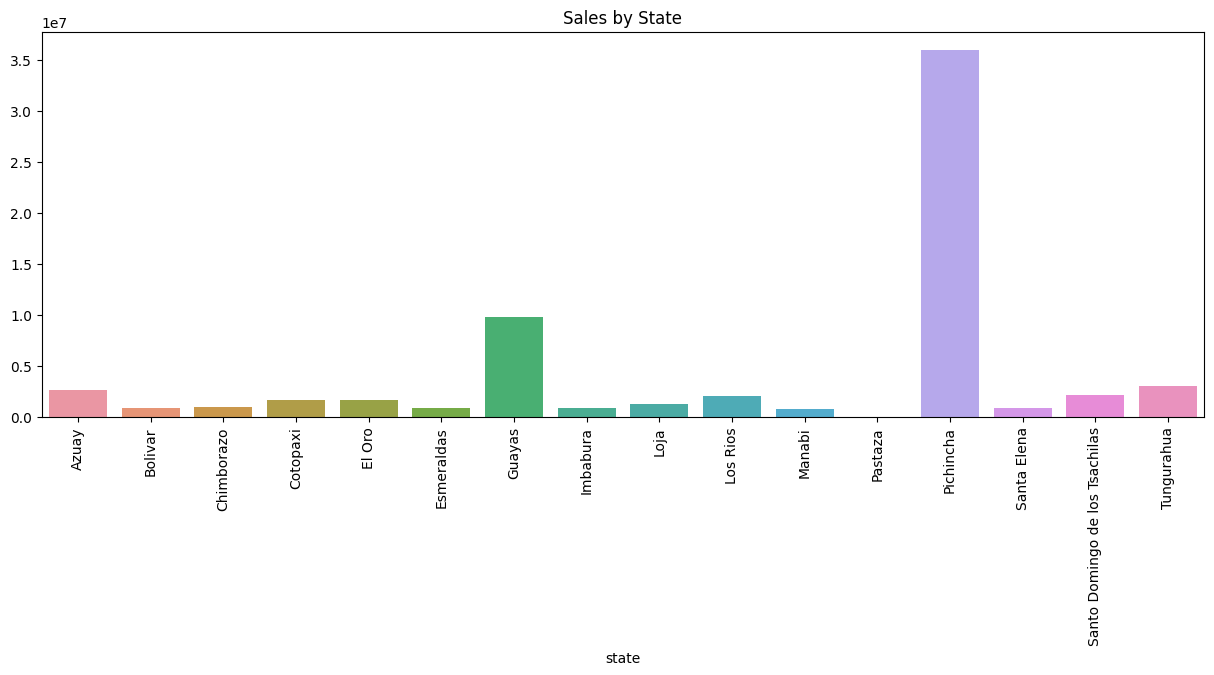

In [61]:
sales_by_sate=stores_sales_df.groupby('state').sales.sum().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(data=sales_by_sate,x=sales_by_sate.sales.index,y=sales_by_sate.sales.values)
plt.title('Sales by State')
plt.xticks(rotation=90)
plt.show()

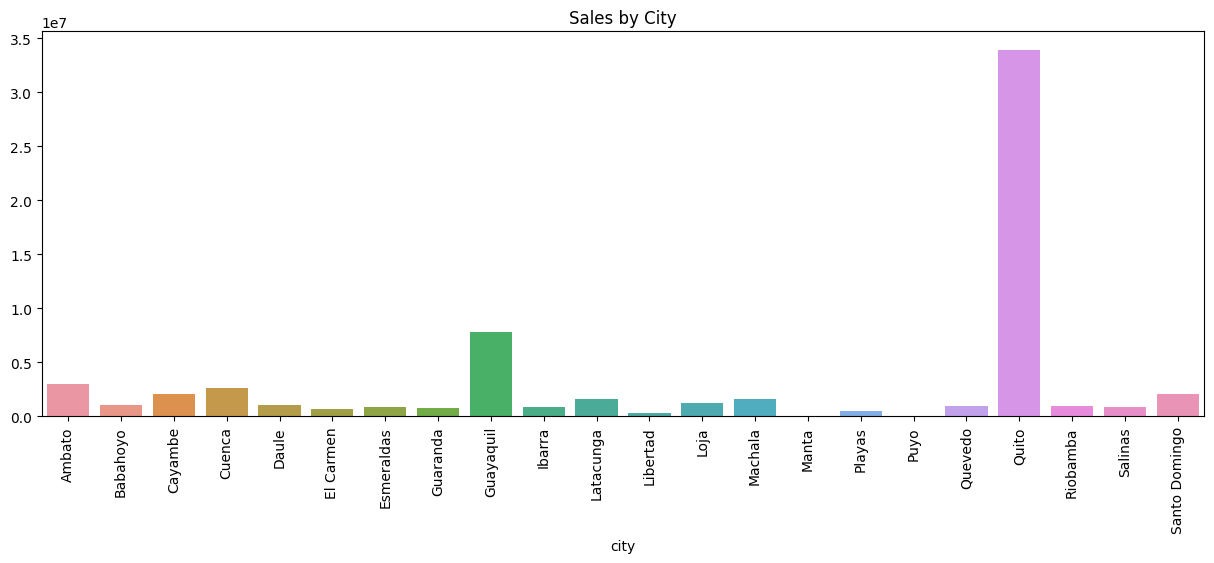

In [62]:
sales_by_city=stores_sales_df.groupby('city').sales.sum().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(data=sales_by_city,x=sales_by_city.sales.index,y=sales_by_city.sales.values)
plt.title('Sales by City')
plt.xticks(rotation=90)
plt.show()

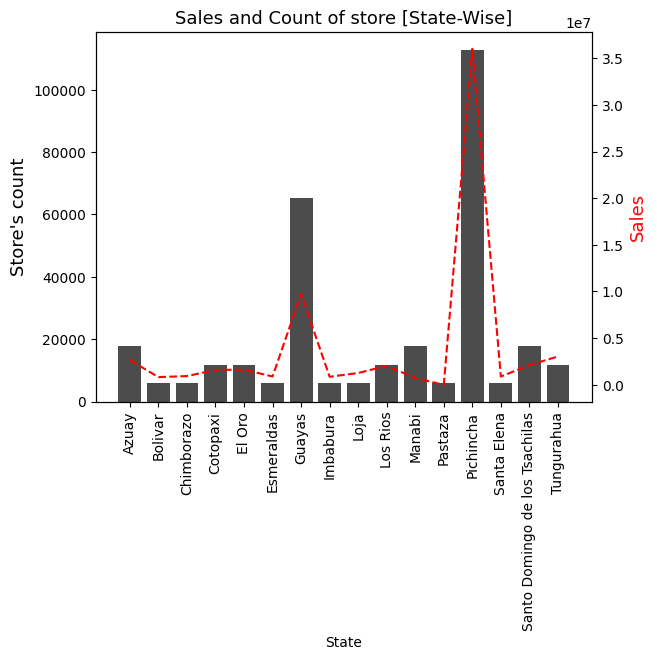

In [63]:
# Creating list based of requirements i.e (name and value should be on same index of 2 diff list)
state=stores_sales_df.groupby('state')
count_store=state.store_nbr.count()
states=[s for s,df in state]
sales_state=state.sales.sum()


# Ploting
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(states,count_store,color='black',alpha=0.7)
ax2.plot(states,sales_state,'r--')

ax1.set_xlabel("State")
ax1.set_ylabel("Store's count",color='black',size=13)
ax2.set_ylabel("Sales",color='red',size=13)
ax1.set_xticklabels(states,rotation='vertical',size=10)
plt.title("Sales and Count of store [State-Wise]",size=13)
plt.show()

* Transactions

In [64]:
tran_df.head()

,date,store_nbr,transactions,month,year,day,day_date
0,2013-01-01,25,770,1,2013,Tuesday,1
1,2013-01-02,1,2111,1,2013,Wednesday,2
2,2013-01-02,2,2358,1,2013,Wednesday,2
3,2013-01-02,3,3487,1,2013,Wednesday,2
4,2013-01-02,4,1922,1,2013,Wednesday,2


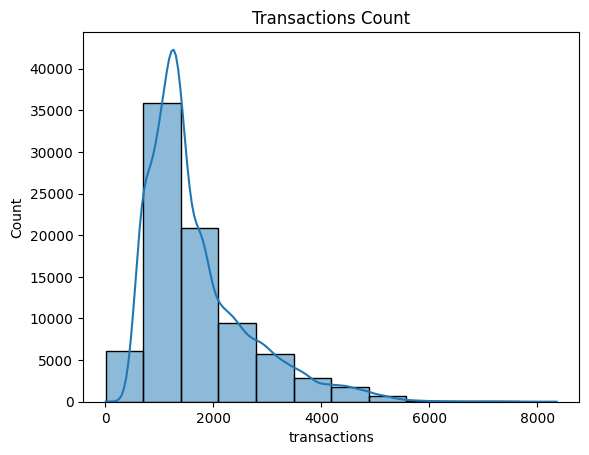

In [65]:
sns.histplot(data=tran_df,x='transactions',kde=True,bins=12)
plt.title("Transactions Count")
plt.show()

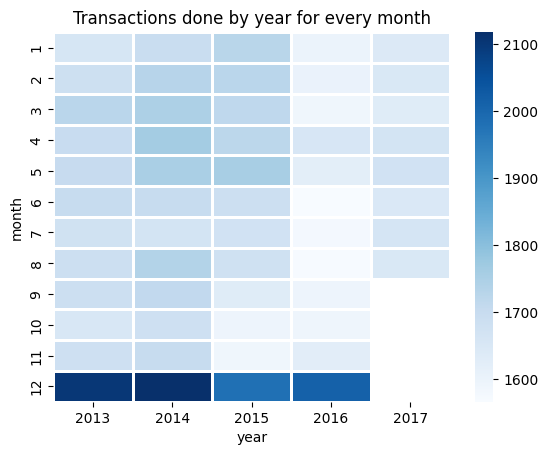

In [66]:
transactions_year_month = tran_df.pivot_table(index='month', columns='year', values='transactions')
# You can separate data with lines
sns.heatmap(transactions_year_month, cmap='Blues', linecolor='white', linewidth=1)
plt.title('Transactions done by year for every month')
plt.show()

* Train DataFrame

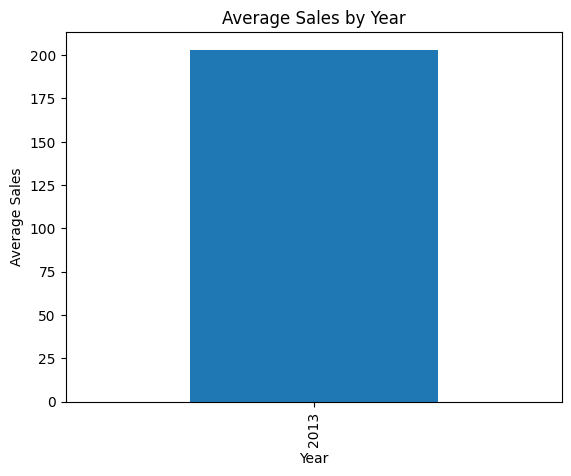

In [67]:
spivot_table = train_df.pivot_table(index='year', values='sales', aggfunc='mean')

# Plotting the graph
spivot_table.plot(kind='bar', legend=False)
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Average Sales by Year')
plt.show()

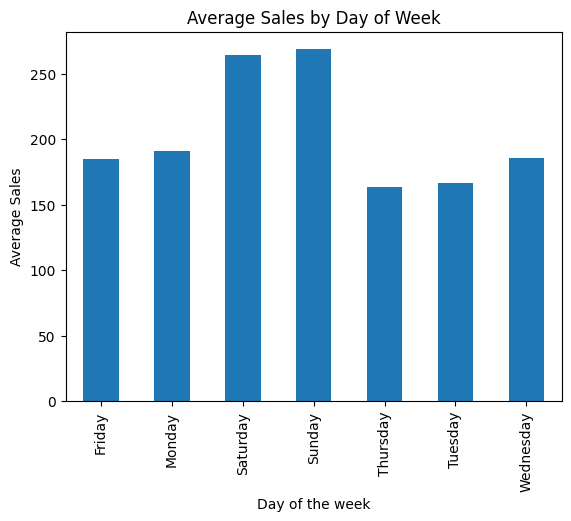

In [68]:
dowpivot_table = train_df.pivot_table(index='day', values='sales', aggfunc='mean')

# Plotting the graph
dowpivot_table.plot(kind='bar', legend=False)
plt.xlabel('Day of the week')
plt.ylabel('Average Sales')
plt.title('Average Sales by Day of Week')
plt.show()

<Figure size 1500x500 with 0 Axes>

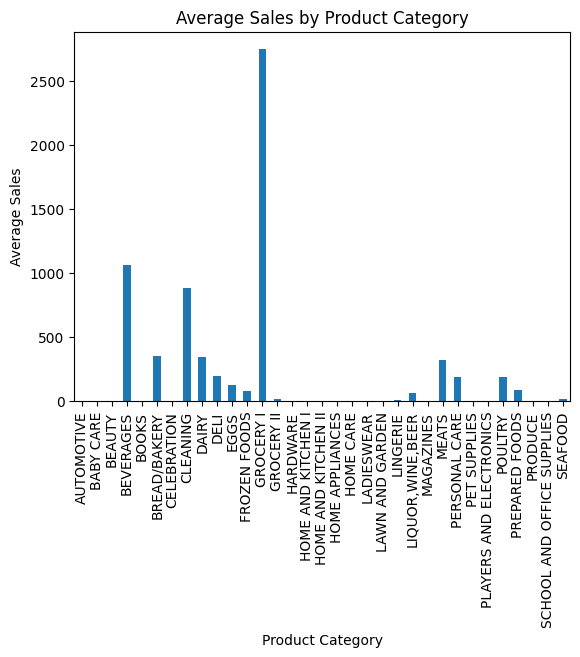

In [69]:
pf_pivot_table = train_df.pivot_table(index='family', values='sales', aggfunc='mean')

# Plotting the graph
plt.figure(figsize=(15,5))
pf_pivot_table.plot(kind='bar', legend=False)
plt.xlabel('Product Category')
plt.ylabel('Average Sales')
plt.title('Average Sales by Product Category')
plt.show()

## Feature Engineering

In [72]:
print("Train Data set columns : ",list(train_df.columns))
print("Test Data set columns : ",list(test_df.columns))
print("Store Data set columns : ",list(stores_df.columns))

Train Data set columns :  ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'month', 'year', 'day', 'day_date']
Test Data set columns :  ['id', 'date', 'store_nbr', 'family', 'onpromotion', 'month', 'year', 'day', 'day_date']
Store Data set columns :  ['store_nbr', 'city', 'state', 'type', 'cluster']


In [73]:
trainDf = pd.merge(train_df,stores_df,how='inner',on='store_nbr')
testDf = pd.merge(test_df,stores_df,how='inner',on='store_nbr')
print("Train Data set columns : ",list(trainDf.columns))
print("Test Data set columns : ",list(testDf.columns))

Train Data set columns :  ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'month', 'year', 'day', 'day_date', 'city', 'state', 'type', 'cluster']
Test Data set columns :  ['id', 'date', 'store_nbr', 'family', 'onpromotion', 'month', 'year', 'day', 'day_date', 'city', 'state', 'type', 'cluster']


## Defining the input and target columns

In [74]:
input_cols = ['store_nbr', 'family', 'onpromotion', 'month', 'year', 'day', 'day_date', 'city', 'state', 'type', 'cluster']
target_cols = ['sales']

In [75]:
#obtaining the non object dtypes
numerical_features = [feature for feature in trainDf[input_cols] if trainDf[feature].dtypes!='O']
print(numerical_features)
categorical_features = [feature for feature in trainDf[input_cols] if trainDf[feature].dtypes=='O']
print(categorical_features)

['store_nbr', 'onpromotion', 'month', 'year', 'day_date', 'cluster']
['family', 'day', 'city', 'state', 'type']


In [76]:
print(trainDf[numerical_features].isna().sum())
print(trainDf[categorical_features].isna().sum())

store_nbr      0
onpromotion    0
month          0
year           0
day_date       0
cluster        0
dtype: int64
family    0
day       0
city      0
state     0
type      0
dtype: int64


## Data Preprocessing

In [77]:
trainDf[numerical_features]

,store_nbr,onpromotion,month,year,day_date,cluster
0,1.0,0.0,1,2013,1,13
1,1.0,0.0,1,2013,1,13
2,1.0,0.0,1,2013,1,13
3,1.0,0.0,1,2013,1,13
4,1.0,0.0,1,2013,1,13
...,...,...,...,...,...,...
320762,9.0,0.0,6,2013,29,6
320763,9.0,0.0,6,2013,29,6
320764,9.0,0.0,6,2013,29,6
320765,9.0,0.0,6,2013,29,6


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainDf[numerical_features])

StandardScaler()

In [79]:
trainDf[numerical_features]=scaler.transform(trainDf[numerical_features])
testDf[numerical_features]=scaler.transform(testDf[numerical_features])

## Encoding for categorical features

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(trainDf[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [82]:
encoded_cols=list(encoder.get_feature_names_out(categorical_features))

In [83]:
trainDf[encoded_cols]=encoder.transform(trainDf[categorical_features])
testDf[encoded_cols]=encoder.transform(testDf[categorical_features])

In [84]:
trainData=trainDf[numerical_features+encoded_cols]
testData=testDf[numerical_features+encoded_cols]
trainData.shape,testData.shape

((320767, 89), (28512, 89))

## Model Building

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = trainData.copy()
y = trainDf[target_cols]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    # ('Random Forest Regressor', RandomForestRegressor(random_state=42))
]

# Evaluate models using k-fold cross-validation
for model_name, model in models:
    # For RandomForestRegressor, add hyperparameters to the parameter grid
    if model_name == 'Random Forest Regressor':
        param_grid = {
            'n_estimators': [10, 15, 30],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 8],
            'min_samples_leaf': [1, 2, 4]
        }
    else:
        # For other models, use a basic parameter grid
        param_grid = {}

    # Create the GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Fit the model to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Print the best parameters
    print(f"\nBest Parameters for {model_name}:", best_params)

    # Evaluate the best model using k-fold cross-validation
    mse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-mse_scores)

    # Print cross-validation results
    print(f"Cross-validation RMSE scores for {model_name}: {rmse_scores}")
    print(f"Mean RMSE: {np.mean(rmse_scores)}")

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model on the test set
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"\nTest set RMSE for {model_name}: {rmse}")

    # Optionally, you can print other metrics as well, like R2 score
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(f"R2 score for {model_name}: {r2}")



Best Parameters for Linear Regression: {}
Cross-validation RMSE scores for Linear Regression: [448.43794289 434.27915129 431.68155695 427.60886844 446.64514099]
Mean RMSE: 437.73053211292955

Test set RMSE for Linear Regression: 437.92352023957966
R2 score for Linear Regression: 0.5888385989674367

Best Parameters for Decision Tree Regressor: {}
Cross-validation RMSE scores for Decision Tree Regressor: [179.7441305  181.23371422 214.30101129 173.26191091 221.32767169]
Mean RMSE: 193.9736877194814

Test set RMSE for Decision Tree Regressor: 182.30486476295638
R2 score for Decision Tree Regressor: 0.9287454977477645
